#                                            Fraudulent Data Detection

### Name : Vonteri Varshith Reddy


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split





### Data Loading

In [2]:
Train_data_file = "./fraudTrain.csv"
Test_data_file = "./fraudTest.csv"
delimiter = ","

name = ["","trans_date_trans_time","cc_num","merchant","category","amt","first","last","gender","street","city","state","zip","lat","long","city_pop","job","dob","trans_num","unix_time","merch_lat","merch_long","is_fraud"
]
Train_data = pd.read_csv(Train_data_file,delimiter = delimiter,header=None,names = name)
Test_data  = pd.read_csv(Test_data_file,Train_data_file,delimiter = delimiter,header=None, names = name)

Train_data.drop(Train_data.index[0], inplace=True)
Test_data.drop(Test_data.index[0], inplace=True)

c:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,5,12,13,14,15,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Train_data.head()

,,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,0.0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
2,1.0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159046999999994,-118.186462,0
3,2.0,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
4,3.0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
5,4.0,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
Test_data.head()

,,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,0.0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
2,1.0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.436,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450497999999996,-109.960431,0
3,2.0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.49581,-74.196111,0
4,3.0,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812397999999998,-80.883061,0
5,4.0,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.01700000000001,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Preprocessing the data

In [5]:
Train_data['hour'] = pd.to_datetime(Train_data['trans_date_trans_time']).dt.hour
Test_data['hour'] = pd.to_datetime(Test_data['trans_date_trans_time']).dt.hour

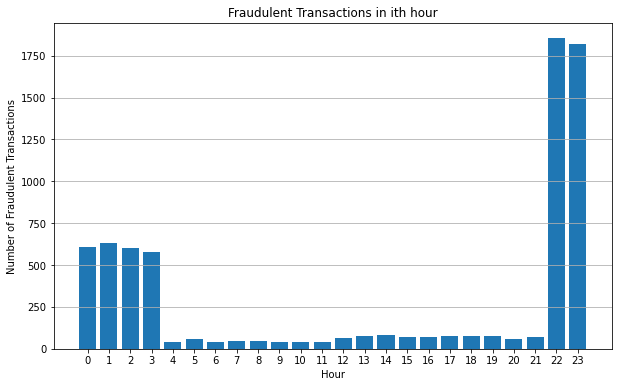

In [6]:
fraudulent_data = Train_data[Train_data['is_fraud'] == 1]

# Counting frequency of fraudulent transactions for each hour 
fraudulent_counts = fraudulent_data.groupby('hour').size()

# Plot of (Number of fraudulent transactions during ith hour) v/s (time(in hour))
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_counts.index, fraudulent_counts.values)
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions in ith hour')
plt.xticks(range(24))  
plt.grid(axis='y') 
plt.show()

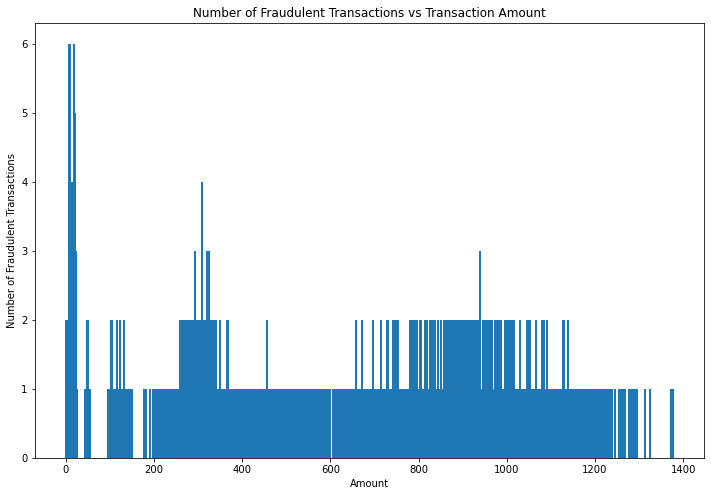

In [7]:
fraudulent_data = Train_data[Train_data['is_fraud'] == 1]

# Counting frequency of fraudulent transactions for each value of amount
fraudulent_amount_counts = fraudulent_data['amt'].value_counts()

# Plot of (Number of fraudulent transactions for a value of transaction amount) v/s (amount values)
plt.figure(figsize=(12, 8))
plt.bar(fraudulent_amount_counts.index, fraudulent_amount_counts.values, width=5) 
plt.xlabel('Amount')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions vs Transaction Amount')
plt.show()

In [8]:
# Checking for Nan values or not useful data points
# Converting the attribute is_fraud from string to integer for easy comparision
print(Train_data['is_fraud'].unique())
print(Train_data['is_fraud'].dtype)

Train_data['is_fraud'] = Train_data['is_fraud'].replace({'0': 0, '1': 1})
Train_data['is_fraud'] = Train_data['is_fraud'].astype(int)

Test_data['is_fraud'] = Test_data['is_fraud'].replace({'0': 0, '1': 1})
Test_data['is_fraud'] = Test_data['is_fraud'].astype(int)


['0' '1' 0 1]
object


### Training on SVM Model

In [9]:
# Converting the extracted 'hour' attribute column(train input,test inputs for the model) to 2D array to train and test the model

X_train = np.array(Train_data["hour"]).reshape(-1, 1)
y_train = Train_data["is_fraud"]

X_test = np.array(Test_data["hour"]).reshape(-1, 1)
y_test = Test_data["is_fraud"]

# SVM Model Instantiation
SVM = SVC(kernel='linear')

# Fitting the train data
SVM.fit(X_train, y_train)


SVC(kernel='linear')

### SVM Model Evaluation

##### - Accuracy on training data

In [21]:
# Model Evaluation
accuracy = SVM.score(X_train, y_train)
accuracy = accuracy*100
print(f"Percentage Accuracy of SVM model on Train data: {accuracy:.7f}")

Percentage Accuracy of SVM model on Train data: 99.4211348


##### - Accuracy on testing data

In [22]:
# Model Evaluation
accuracy = SVM.score(X_test, y_test)
accuracy = accuracy*100
print(f"Percentage Accuracy of SVM model on Test data: {accuracy:.7f}")

Percentage Accuracy of SVM model on Test data: 99.6140136


### Training on Random Forest Classifier

In [12]:
# Converting the extracted 'hour' attribute column(train input,test inputs for the model) to 2D array to train and test the model

X_train = np.array(Train_data["hour"]).reshape(-1, 1)
y_train = Train_data["is_fraud"].replace({'0': 0, '1': 1}).astype(int)

X_test = np.array(Test_data["hour"]).reshape(-1, 1)
y_test = Test_data["is_fraud"].replace({'0': 0, '1': 1}).astype(int)

# Random Forest Classifier Instantiation 
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Fitting the train data
RandomForest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Random Forest Classifier Evaluation

##### - Accuracy on training data

In [20]:
# Model Evaluation
accuracy = RandomForest.score(X_train, y_train)
accuracy = accuracy*100
print(f"Percentage Accuracy of Random Forest model on Train data: {accuracy:.7f}")

Percentage Accuracy of Random Forest model on Train data: 99.4211348


##### - Accuracy on training data

In [19]:
# Model Evaluation
accuracy = RandomForest.score(X_test, y_test)
accuracy = accuracy*100
print(f"Percentage Accuracy of Random Forest model on Test data: {accuracy:.7f}")

Percentage Accuracy of Random Forest model on Test data: 99.6140136
